# **Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import cv2

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

# **Import Data**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_dir="/content/drive/MyDrive/FYP2Dataset/"

In [7]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/FYP2Dataset')

In [8]:
list(data_dir.glob('jasmine-qc/*.jpeg'))[:10]

[PosixPath('/content/drive/MyDrive/FYP2Dataset/jasmine-qc/WhatsApp Image 2022-05-18 at 12.36.19 PM (2).jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/jasmine-qc/WhatsApp Image 2022-05-18 at 12.36.17 PM (2).jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/jasmine-qc/WhatsApp Image 2022-05-18 at 12.36.18 PM (3).jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/jasmine-qc/WhatsApp Image 2022-05-18 at 12.35.07 PM.jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/jasmine-qc/WhatsApp Image 2022-05-18 at 12.35.01 PM.jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/jasmine-qc/WhatsApp Image 2022-05-18 at 12.35.01 PM (3).jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/jasmine-qc/WhatsApp Image 2022-05-18 at 12.35.50 PM (1).jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/jasmine-qc/WhatsApp Image 2022-05-18 at 12.35.50 PM (5).jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/jasmine-qc/WhatsApp Image 2022-05-18 at 12.35.50 PM (9).jpeg'),
 PosixPat

In [9]:
len(list(data_dir.glob('Pink Sadabahar/*.*')))

81

In [10]:
flowers_images_dict = {
    'Bluebell':list(data_dir.glob('Bluebell/*.jpg')),
    'Buttercup':list(data_dir.glob('Buttercup/*.jpg')),
    'BishopOfIlandaff': list(data_dir.glob('BishopOfIlandaff/*.jpg')),
    'Crocus': list(data_dir.glob('Crocus/*.jpg')),
    'Daffodils': list(data_dir.glob('Daffodils/*.jpg')),
    'Daisy': list(data_dir.glob('Daisy/*.jpg')),
    'Dandelion': list(data_dir.glob('Dandelion/*.jpg')),
    'Fritillary':list(data_dir.glob('Fritillary/*.jpg')),
    'Iris':list(data_dir.glob('Iris/*.jpg')),
    'Rose':list(data_dir.glob('Rose/*.jpg')),
    'Snowdrop':list(data_dir.glob('Snowdrop/*.jpg')),
    'Tigerlily':list(data_dir.glob('Tigerlily/*.jpg')),
    'Gazania':list(data_dir.glob('Gazania/*.jpg')),
    'Sunflower':list(data_dir.glob('Sunflower/*.jpg')),
    'Jasmine':list(data_dir.glob('jasmine-qc/*.*')),
    'Periwinkle':list(data_dir.glob('Pink Sadabahar/*.*')),
    'CrownOfThorns':list(data_dir.glob('COT-QC/*.*')),
    'BlanketFlower':list(data_dir.glob('BFlower-Compressed Quality Check/*.*'))
}

In [11]:
flowers_labels_dict = {
    'Bluebell':0,
    'Buttercup':1,
    'BishopOfIlandaff': 2,
    'Crocus': 3,
    'Daffodils': 4,
    'Daisy': 5,
    'Dandelion': 6,
    'Fritillary':7,
    'Iris':8,
    'Rose':9,
    'Snowdrop':10,
    'Tigerlily':11,
    'Gazania':12,
    'Sunflower':13,
    'Jasmine':14,
    'Periwinkle':15,
    'CrownOfThorns': 16,
    'BlanketFlower': 17
}

In [12]:
classes=['Bluebell',
    'Buttercup',
    'BishopOfIlandaff',
    'Crocus',
    'Daffodils',
    'Daisy',
    'Dandelion',
    'Fritillary',
    'Iris',
    'Rose',
    'Snowdrop',
    'Tigerlily',
    'Gazania',
    'Sunflower',
    'Jasmine',
    'Periwinkle',
    'CrownOfThorns',
    'BlanketFlower']

In [13]:
len(list(data_dir.glob('Rose/*.jpg')))

111

In [14]:
flowers_images_dict[classes[15]][70:75]

[PosixPath('/content/drive/MyDrive/FYP2Dataset/Pink Sadabahar/WhatsApp Image 2022-06-17 at 9.52.09 PM.jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/Pink Sadabahar/WhatsApp Image 2022-06-17 at 9.52.10 PM (1).jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/Pink Sadabahar/WhatsApp Image 2022-06-17 at 9.52.11 PM (1).jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/Pink Sadabahar/WhatsApp Image 2022-06-17 at 9.52.11 PM (2).jpeg'),
 PosixPath('/content/drive/MyDrive/FYP2Dataset/Pink Sadabahar/WhatsApp Image 2022-06-17 at 9.52.11 PM.jpeg')]

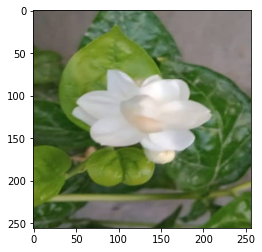

In [15]:
img=cv2.imread(str(flowers_images_dict['Jasmine'][69]))
img=cv2.resize(img,(256,256))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [16]:
X, Y = [], []

for flower_name, images_path in flowers_images_dict.items(): #one flower = multiple images
    for image in images_path:
        img = cv2.imread(str(image))
        img = cv2.resize(img,(256,256))
        img=img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        X.append(img)
        Y.append(flowers_labels_dict[flower_name])

# **Train Test Split**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

In [18]:
X_train=np.array(X_train)

In [19]:
X_test=np.array(X_test)

In [20]:
y_train=np.array(y_train)

In [21]:
y_test=np.array(y_test)

In [22]:
X_train.shape,y_train.shape

((1184, 256, 256, 3), (1184,))

In [23]:
X_test.shape,y_test.shape

((297, 256, 256, 3), (297,))

In [24]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [25]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

# **Normalize Data**

In [26]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

Text(0.5, 1.0, 'Tigerlily')

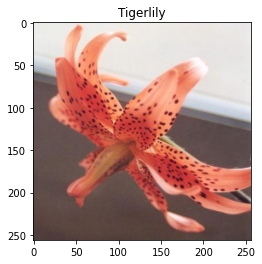

In [27]:
plt.imshow(X_train[920])
plt.title(classes[y_train[920]])

Text(0.5, 1.0, 'Tigerlily')

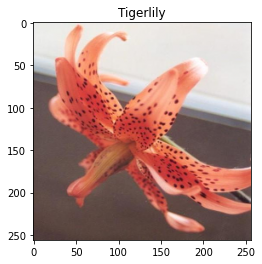

In [28]:
plt.imshow(X_train_scaled[920])
plt.title(classes[y_train[920]])

In [29]:
type(X_test_scaled)

numpy.ndarray

# **Model Building**

# Data Augmentation

In [30]:
data_augmentation = Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(256,256,3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

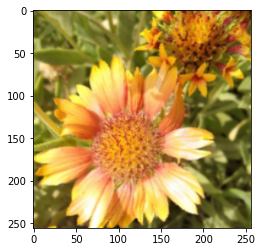

In [31]:
plt.imshow(data_augmentation(X_train_scaled)[1120])

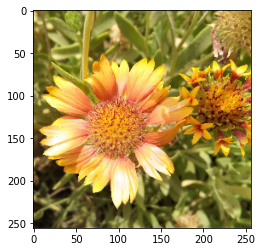

In [32]:
plt.imshow(X_train_scaled[1120])

# Model Architecture

In [33]:
num_classes=18
cnn = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=[256,256,3]), #filters=16,kernel_size=3
  layers.MaxPooling2D(), #default pool_size=(2,2)
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(units=192, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(units=num_classes, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
history=cnn.fit(X_train_scaled,y_train,epochs=100,batch_size=10,validation_data=(X_test_scaled,y_test))

Epoch 1/100
119/119 [==============================] - 15s 28ms/step - loss: 2.4148 - accuracy: 0.2120 - val_loss: 1.6881 - val_accuracy: 0.4108
Epoch 2/100
119/119 [==============================] - 3s 22ms/step - loss: 1.6813 - accuracy: 0.4358 - val_loss: 1.1273 - val_accuracy: 0.6296
Epoch 3/100
119/119 [==============================] - 3s 21ms/step - loss: 1.3794 - accuracy: 0.5270 - val_loss: 1.2026 - val_accuracy: 0.6061
Epoch 4/100
119/119 [==============================] - 3s 22ms/step - loss: 1.1957 - accuracy: 0.6056 - val_loss: 0.9688 - val_accuracy: 0.6768
Epoch 5/100
119/119 [==============================] - 3s 21ms/step - loss: 1.1190 - accuracy: 0.6115 - val_loss: 0.9219 - val_accuracy: 0.6902
Epoch 6/100
119/119 [==============================] - 3s 21ms/step - loss: 1.0161 - accuracy: 0.6486 - val_loss: 0.8422 - val_accuracy: 0.7138
Epoch 7/100
119/119 [==============================] - 3s 21ms/step - loss: 0.8727 - accuracy: 0.6976 - val_loss: 0.8643 - val_accuracy

In [34]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)       

In [35]:
cnn.save('/content/drive/MyDrive/Models/adamMODEL95-91.h5')

# **Confusion Matrix, Accuracy & Loss Graphs**

In [36]:
y_pred=cnn.predict(X_test_scaled)
y_predicted_indices=[]
i=0
while(i<len(y_pred[:])):
  #print(i)
  
  result_index=np.argmax(y_pred[i])
  y_predicted_indices.append(result_index)
  i+=1
#y_predicted_indices[0]
y_predicted_indices=np.array(y_predicted_indices)
cm=confusion_matrix(y_test,y_predicted_indices)
cm

array([[18,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,
         0,  0],
       [ 0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0, 12,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0, 11,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  5,  0,  0, 12,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0],
       [ 0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  3,  0,  7,  1,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 2,  0,  0,  1,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0, 25,  0,  1,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0, 10,  0,  0,  0,  1,  0,
         1,  0],
       [ 0,  0,  0,  

Text(69.0, 0.5, 'Original')

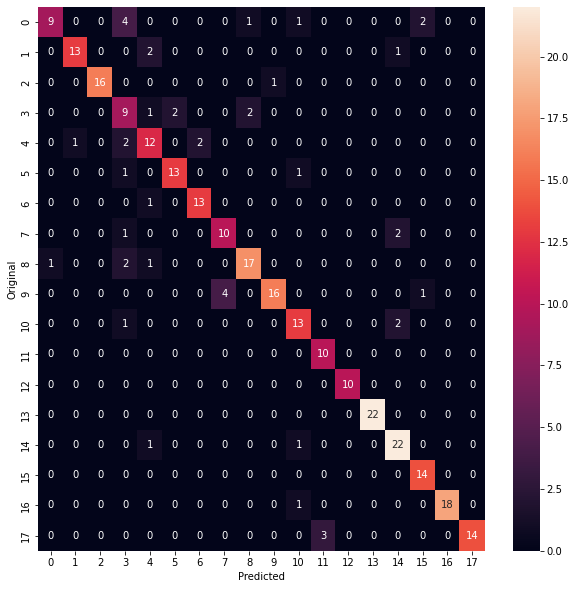

In [ ]:
plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Original')

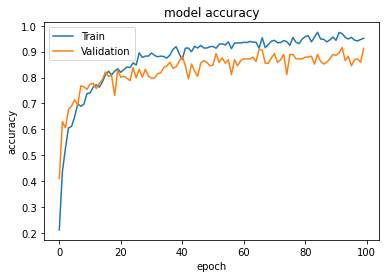

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

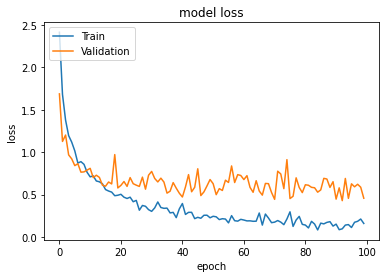

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Predictions**

In [39]:
pred=cnn.predict(X_test_scaled[30:50])
len(pred)

20

In [40]:
pred_class=[]
for i in range(0,len(pred)):
  pred_class.append(np.argmax(pred[i]))

In [41]:
pred_class

[14, 1, 2, 17, 15, 1, 9, 15, 12, 4, 1, 1, 1, 11, 14, 17, 0, 8, 13, 14]

In [42]:
y_test[30:50]

array([14,  1,  2, 17, 15,  1,  9, 15, 12,  6,  4,  1,  1, 11, 14, 17,  0,
        8, 13, 14])

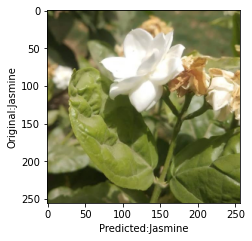

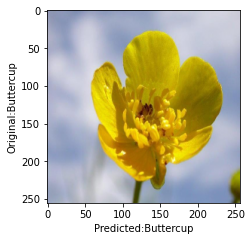

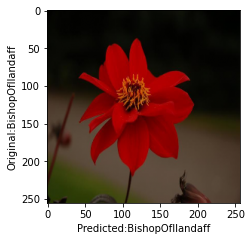

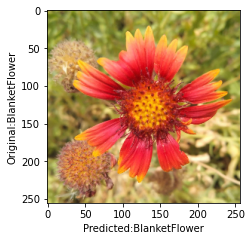

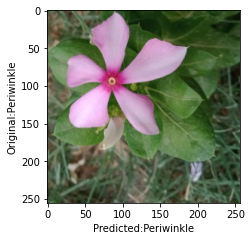

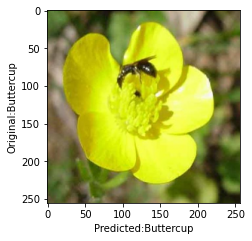

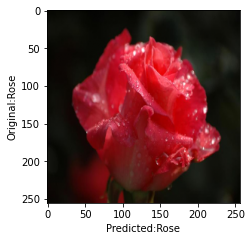

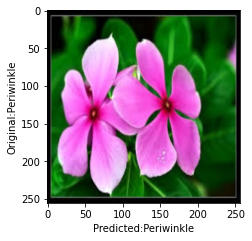

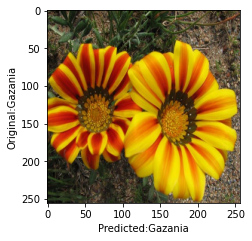

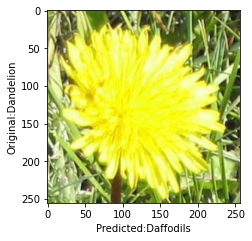

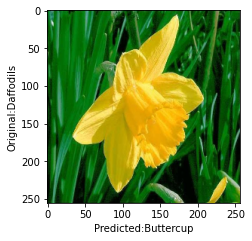

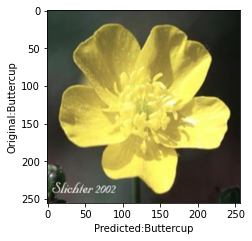

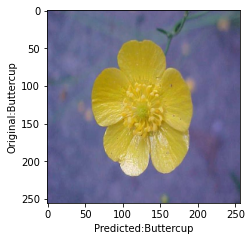

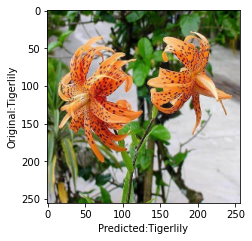

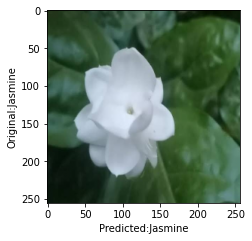

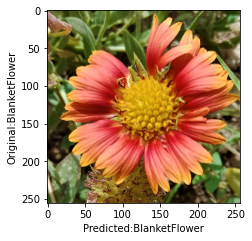

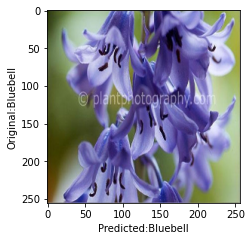

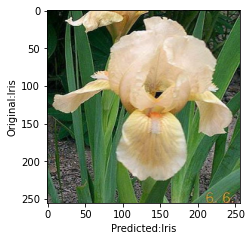

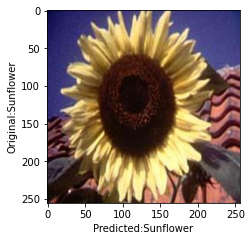

In [43]:
x=1
for i in range(0,len(pred)-1):
      plt.figure(figsize=(20,20))
      plt.subplot(4,5,x)
      plt.imshow(X_test_scaled[30+i])
      plt.xlabel('Predicted:{0}'.format(classes[pred_class[i]]))
      plt.ylabel('Original:{0}'.format(classes[y_test[30+i]]))
      x=x+1
plt.show()

# **Visualize Model**

In [45]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 4.6 MB/s 


In [46]:
import visualkeras

In [47]:
visualkeras.layered_view(cnn, to_file="/content/drive/MyDrive/Models/adam95-91.png",legend=True).show()

In [48]:
visualkeras.layered_view(cnn,legend=True).show()

# **Visualize Feature Map**

In [49]:
model = cnn
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 conv2d (None, 256, 256, 16)
3 conv2d_1 (None, 128, 128, 32)
5 conv2d_2 (None, 64, 64, 64)


In [51]:
from tensorflow.keras import Model

In [52]:
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [53]:
# load the image with the required shape
img = cv2.imread("/content/daisy.jpg")
img = cv2.resize(img,(256,256))

In [54]:
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

In [55]:
img.shape

(1, 256, 256, 3)

In [56]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

In [58]:
from matplotlib import pyplot

In [66]:
from matplotlib.pyplot import figure

**Layer 1**

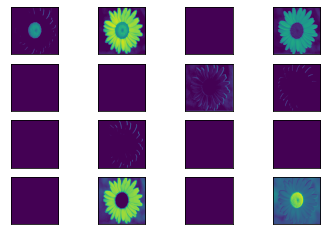

In [73]:
# plot all 16 maps in an 4x4 squares
square = 4
ix = 1
for _ in range(square):
  for _ in range(square):
    # specify subplot and turn of axis
    ax = pyplot.subplot(square, square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
    ix += 1
# show the figure
pyplot.show()

**Layer 2**

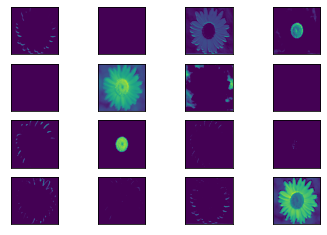

In [93]:
model=cnn
ixs = [3]
for i in ixs:
  outputs = model.layers[i].output
model = Model(inputs=model.inputs, outputs=outputs)
feature_maps = model.predict(img)
# plot the output from each block
square = 4
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[:, :, ix-1], cmap='viridis')
			ix += 1
	# show the figure
	pyplot.show()

**Layer 3**

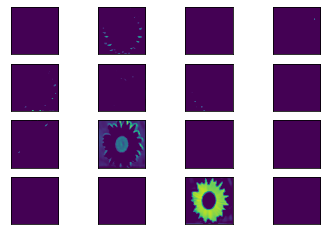

In [94]:
model=cnn
ixs = [5]
for i in ixs:
  outputs = model.layers[i].output
model = Model(inputs=model.inputs, outputs=outputs)
feature_maps = model.predict(img)
# plot the output from each block
square = 4
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[:, :, ix-1], cmap='viridis')
			ix += 1
	# show the figure
	pyplot.show()